In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('MY.38362002.csv')

# Display the first few rows of the dataframe
data.head()

,ConditionName,ConditionSNOMED,PathogenName,PathogenTaxonID,Fatalities,CountryName,CountryISO,Admin1Name,Admin1ISO,Admin2Name,CityName,PeriodStartDate,PeriodEndDate,PartOfCumulativeCountSeries,AgeRange,Subpopulation,PlaceOfAcquisition,DiagnosisCertainty,SourceName,CountValue
0,Dengue,38362002,Dengue virus,12637,0,MALAYSIA,MY,JOHOR,MY-01,NaN,NaN,1/1/1993,31/1/1993,0,0-130,None specified,NaN,NaN,Malaysia Dengue Surveillance System,41
1,Dengue,38362002,Dengue virus,12637,0,MALAYSIA,MY,JOHOR,MY-01,NaN,NaN,1/2/1993,28/2/1993,0,0-130,None specified,NaN,NaN,Malaysia Dengue Surveillance System,52
2,Dengue,38362002,Dengue virus,12637,0,MALAYSIA,MY,JOHOR,MY-01,NaN,NaN,1/3/1993,31/3/1993,0,0-130,None specified,NaN,NaN,Malaysia Dengue Surveillance System,35
3,Dengue,38362002,Dengue virus,12637,0,MALAYSIA,MY,JOHOR,MY-01,NaN,NaN,1/4/1993,30/4/1993,0,0-130,None specified,NaN,NaN,Malaysia Dengue Surveillance System,45
4,Dengue,38362002,Dengue virus,12637,0,MALAYSIA,MY,JOHOR,MY-01,NaN,NaN,1/5/1993,31/5/1993,0,0-130,None specified,NaN,NaN,Malaysia Dengue Surveillance System,55


In [2]:
# Converting 'PeriodStartDate' and 'PeriodEndDate' to datetime format
data['PeriodStartDate'] = pd.to_datetime(data['PeriodStartDate'], dayfirst=True)
data['PeriodEndDate'] = pd.to_datetime(data['PeriodEndDate'], dayfirst=True)

# Checking for missing values
missing_values = data.isnull().sum()

# Display missing values
missing_values


ConditionName                     0
ConditionSNOMED                   0
PathogenName                      0
PathogenTaxonID                   0
Fatalities                        0
CountryName                       0
CountryISO                        0
Admin1Name                       90
Admin1ISO                        90
Admin2Name                     2034
CityName                       2034
PeriodStartDate                   0
PeriodEndDate                     0
PartOfCumulativeCountSeries       0
AgeRange                          0
Subpopulation                     0
PlaceOfAcquisition             2034
DiagnosisCertainty             2034
SourceName                        0
CountValue                        0
dtype: int64

In [3]:
# Extracting year and month from the 'PeriodStartDate'
data['Year'] = data['PeriodStartDate'].dt.year
data['Month'] = data['PeriodStartDate'].dt.month

# Calculating the duration of each reporting period in days
data['ReportingPeriodDuration'] = (data['PeriodEndDate'] - data['PeriodStartDate']).dt.days

# Display the updated dataframe with new features
data[['PeriodStartDate', 'PeriodEndDate', 'Year', 'Month', 'ReportingPeriodDuration', 'CountValue']].head()


,PeriodStartDate,PeriodEndDate,Year,Month,ReportingPeriodDuration,CountValue
0,1993-01-01,1993-01-31,1993,1,30,41
1,1993-02-01,1993-02-28,1993,2,27,52
2,1993-03-01,1993-03-31,1993,3,30,35
3,1993-04-01,1993-04-30,1993,4,29,45
4,1993-05-01,1993-05-31,1993,5,30,55


In [4]:
# Dropping rows where 'Admin1Name' and 'Admin1ISO' are missing
cleaned_data = data.dropna(subset=['Admin1Name', 'Admin1ISO'])

# Verifying the drop by checking for missing values again
cleaned_missing_values = cleaned_data.isnull().sum()

# Initial exploration of the data focusing on the distribution of Dengue cases over time
# Grouping by year and month to see the trend of cases
grouped_data = cleaned_data.groupby(['Year', 'Month']).agg({'CountValue': 'sum'}).reset_index()

# Displaying the cleaned missing values information and the first few rows of the grouped data
cleaned_missing_values, grouped_data.head()


(ConditionName                     0
 ConditionSNOMED                   0
 PathogenName                      0
 PathogenTaxonID                   0
 Fatalities                        0
 CountryName                       0
 CountryISO                        0
 Admin1Name                        0
 Admin1ISO                         0
 Admin2Name                     1944
 CityName                       1944
 PeriodStartDate                   0
 PeriodEndDate                     0
 PartOfCumulativeCountSeries       0
 AgeRange                          0
 Subpopulation                     0
 PlaceOfAcquisition             1944
 DiagnosisCertainty             1944
 SourceName                        0
 CountValue                        0
 Year                              0
 Month                             0
 ReportingPeriodDuration           0
 dtype: int64,
    Year  Month  CountValue
 0  1993      1         124
 1  1993      2         113
 2  1993      3          68
 3  1993      4       

C:\Users\siran\AppData\Local\Temp\ipykernel_7432\2249153847.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="Year", y="CountValue", data=grouped_data, estimator='sum', ci=None, marker="o")


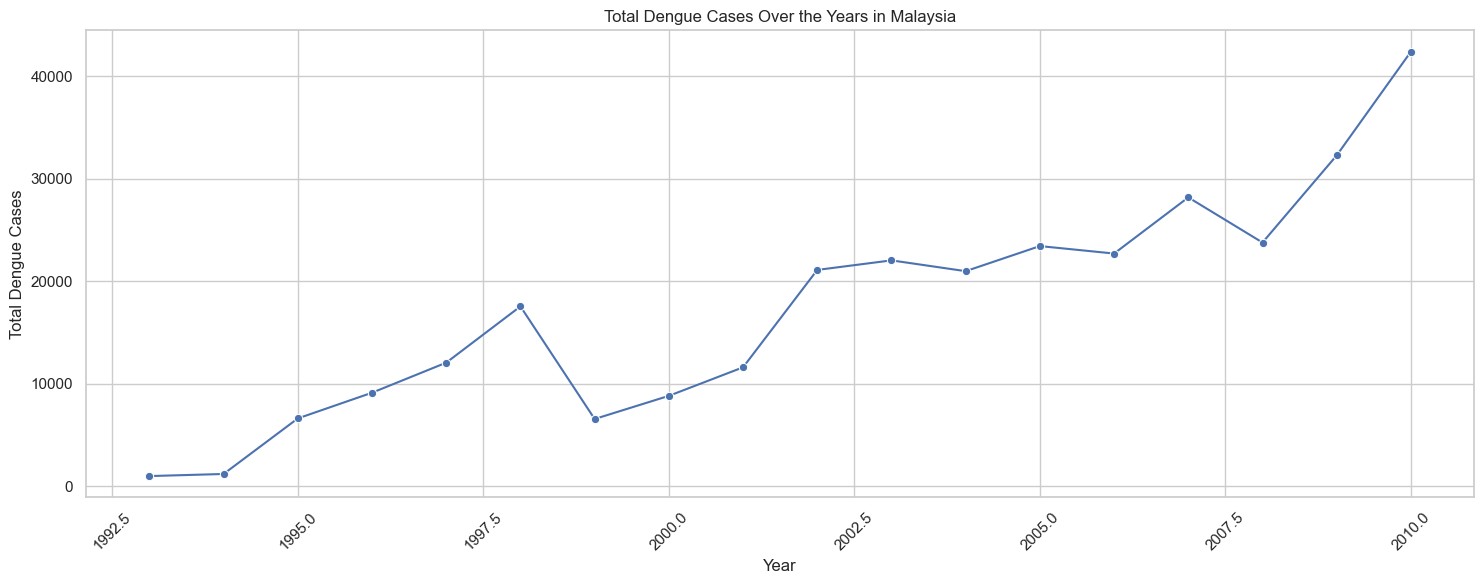

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Creating a time series plot of Dengue cases over the years
plt.figure(figsize=(15, 6))
sns.lineplot(x="Year", y="CountValue", data=grouped_data, estimator='sum', ci=None, marker="o")
plt.title('Total Dengue Cases Over the Years in Malaysia')
plt.ylabel('Total Dengue Cases')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\siran\AppData\Local\Temp\ipykernel_7432\2757731078.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Month", y="CountValue", data=monthly_data, palette="viridis")


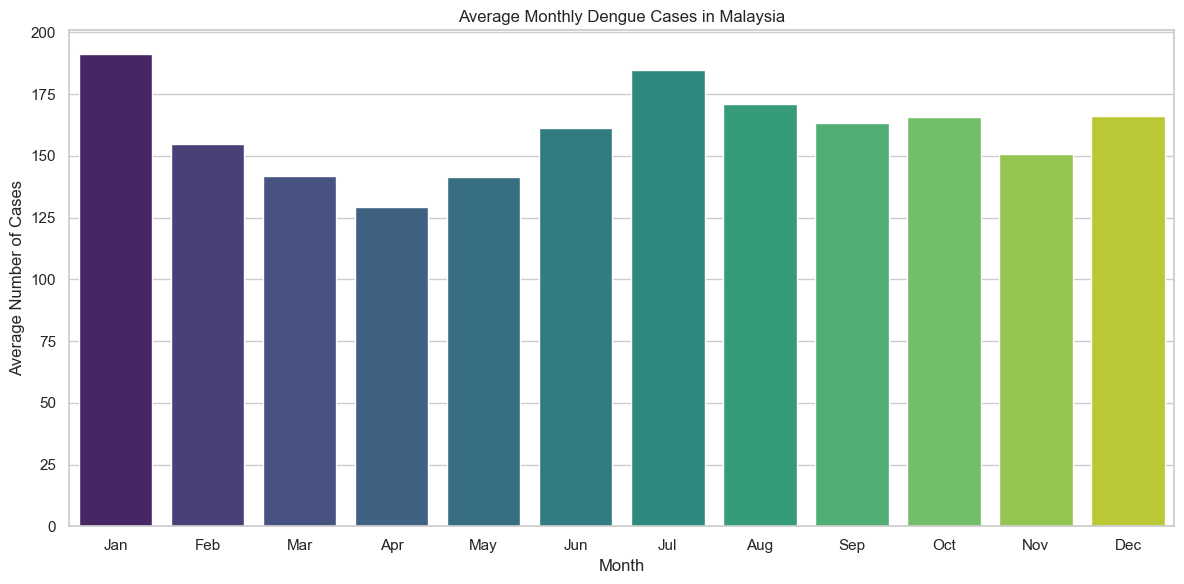

In [6]:
# Grouping the data by month to see the monthly distribution of cases
monthly_data = cleaned_data.groupby('Month').agg({'CountValue': 'mean'}).reset_index()

# Creating a plot to visualize the average number of Dengue cases by month
plt.figure(figsize=(12, 6))
sns.barplot(x="Month", y="CountValue", data=monthly_data, palette="viridis")
plt.title('Average Monthly Dengue Cases in Malaysia')
plt.ylabel('Average Number of Cases')
plt.xlabel('Month')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()

# Show the plot
plt.show()


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features and target
X = cleaned_data[['Year', 'Month']]
y = cleaned_data['CountValue']

# Normalizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Building the model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [10]:
# Training the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)


Epoch 1/100
44/44 [==============================] - 1s 7ms/step - loss: 92058.8359 - val_loss: 71308.5781
Epoch 2/100
44/44 [==============================] - 0s 3ms/step - loss: 91318.1953 - val_loss: 70365.1250
Epoch 3/100
44/44 [==============================] - 0s 3ms/step - loss: 89705.4688 - val_loss: 68215.1641
Epoch 4/100
44/44 [==============================] - 0s 3ms/step - loss: 86268.2031 - val_loss: 64045.9023
Epoch 5/100
44/44 [==============================] - 0s 3ms/step - loss: 80373.9844 - val_loss: 57697.2109
Epoch 6/100
44/44 [==============================] - 0s 3ms/step - loss: 72840.4375 - val_loss: 50957.1562
Epoch 7/100
44/44 [==============================] - 0s 3ms/step - loss: 65860.3906 - val_loss: 45947.9609
Epoch 8/100
44/44 [==============================] - 0s 3ms/step - loss: 61594.8125 - val_loss: 43728.8789
Epoch 9/100
44/44 [==============================] - 0s 3ms/step - loss: 59901.3906 - val_loss: 43234.5273
Epoch 10/100
44/44 [=================

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

# Load and preprocess your dataset (as shown in previous responses)

# Define your ANN model
input_dim = X_train.shape[1]  # Get the number of input features
model = keras.Sequential([
    layers.Input(shape=(input_dim,)),  # Use 'input_dim' as the shape
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # For binary classification, change activation as needed
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on your training data
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model on your test data
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)



NameError: name 'X_train' is not defined

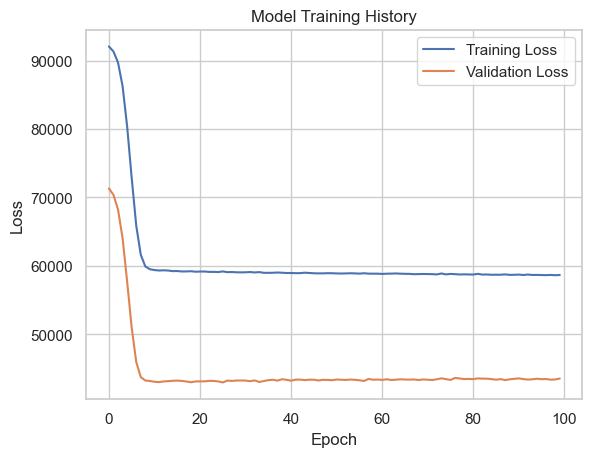

In [12]:
import matplotlib.pyplot as plt

# Plotting training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training History')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()
